In [1]:
from os.path import join
from simulate import *
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
LOAD_DIR = "/dtu/projects/02613_2025/data/modified_swiss_dwellings/"
with open(join(LOAD_DIR, 'building_ids.txt'), 'r') as f:
    building_ids = f.read().splitlines()

In [11]:
import os

total_size = 0
for dirpath, dirnames, filenames in os.walk(LOAD_DIR):
    for filename in filenames:
        filepath = os.path.join(dirpath, filename)
        total_size += os.path.getsize(filepath)

print(f"Total size of all files in {LOAD_DIR}: {total_size} bytes")

Total size of all files in /dtu/projects/02613_2025/data/modified_swiss_dwellings/: 10785537176 bytes


In [27]:
def visualize_data(temperature, interior):
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Visualize temperature
    cax1 = axes[0].imshow(temperature, cmap='hot', interpolation='nearest')
    fig.colorbar(cax1, ax=axes[0])
    axes[0].set_title('Temperature')
    axes[0].set_xlabel('X-axis')
    axes[0].set_ylabel('Y-axis')

    # Visualize walls
    axes[1].imshow(interior, cmap='gray', interpolation='nearest')
    axes[1].set_title('Walls')

    plt.tight_layout()
    plt.show()

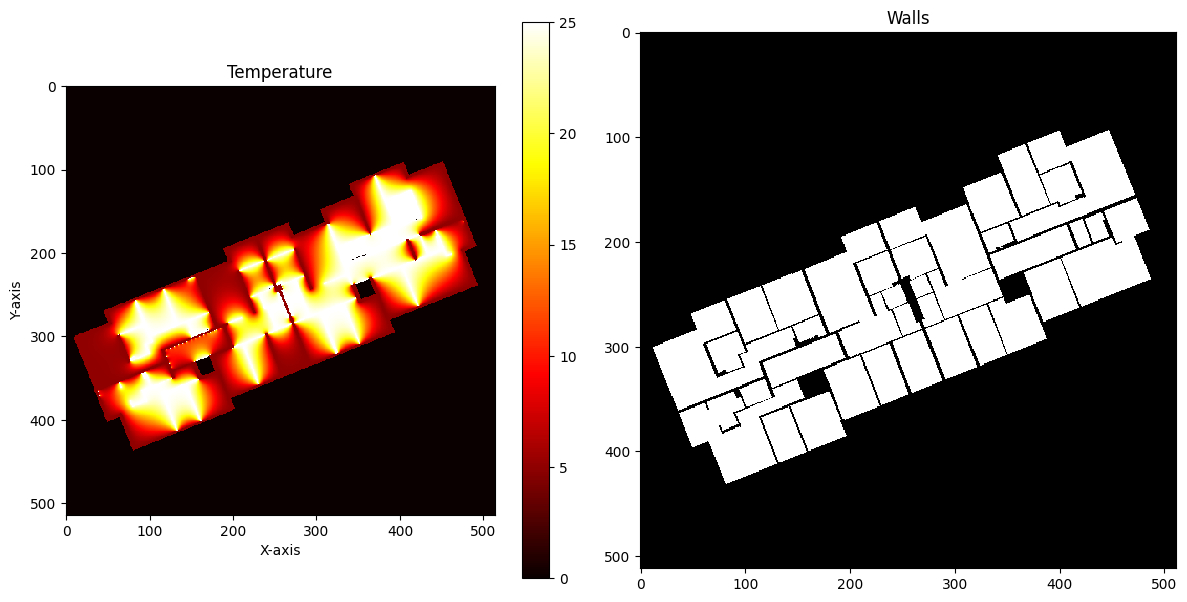

In [50]:
temperature, interior = load_data(LOAD_DIR, building_ids[15])

new_temp = jacobi(temperature, interior, max_iter=100000, atol=0.001)
visualize_data(new_temp, interior)

In [47]:
print(summary_stats(temperature, interior))
print(summary_stats(new_temp, interior))

{'mean_temp': np.float64(0.0), 'std_temp': np.float64(0.0), 'pct_above_18': np.float64(0.0), 'pct_below_15': np.float64(100.0)}
{'mean_temp': np.float64(10.847730561823877), 'std_temp': np.float64(5.832978921080062), 'pct_above_18': np.float64(16.335812644486882), 'pct_below_15': np.float64(75.46361443361141)}
